# This Machine Learning model will detect if a person have diabetes or not

## Objective : 
### In this we have to make a machine learning model that is capable to identify between those people that have diabetes and those who do not have diabetes.

## Models used for testing :
### In this stage we are applying SVM , Logistic Regression, Polynomial Regression, Linear Regression models to test which model gives us best accuracy score with least number of miss classified samples from the diabetes data Frame.

![](framework.png)

## Importing the required python libraries

In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #importing pyplot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score
from sklearn.preprocessing import MinMaxScaler 
import seaborn as sb

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [222]:
### read csv file
df = pd.read_csv('diabetes.csv')

In [223]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [224]:
df.shape #checking the shape of the dataframe

(768, 9)

In [225]:
# gives information of the data types
df.info

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

In [226]:
df.isnull().sum() # checking if the dataframe has any null value or not 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [227]:
# basic statistic details about the data (note only numerical columns would be displayed here unless parameter 
# include="all")
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot:title={'center':'Correlation between dataset variables'}>

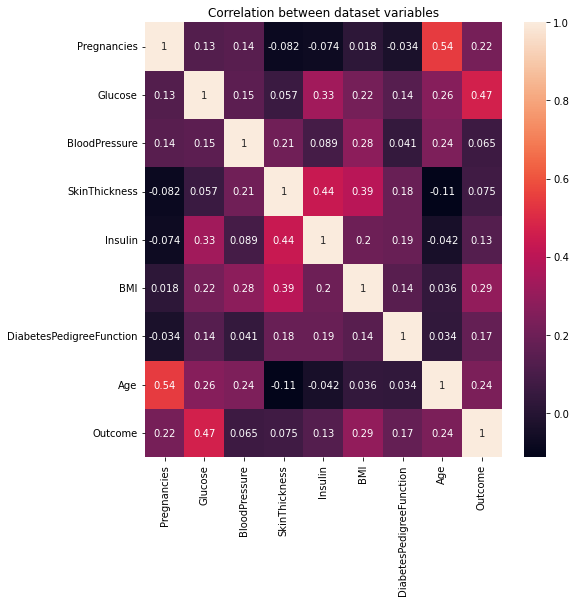

In [228]:
 #print a graph for correlation
plt.figure(figsize=(8,8))
plt.title('Correlation between dataset variables')
sb.heatmap(df.corr(), annot=True)

In [229]:
df.Outcome.value_counts() # getting the number of classes in the target columns

0    500
1    268
Name: Outcome, dtype: int64

In [230]:
x = df.iloc[:,:-1] # features

In [231]:
y = df.iloc[:,8] #target values

In [232]:
np.bincount(y)

array([500, 268])

## Applying SVM on the dibetes dataFrame

In [233]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.2,random_state=12)

In [234]:
p = [{'kernel':['linear'],'C':[.01,1,10]},{'kernel':['rbf'],'gamma':[.001,.01,.1,10]}]
clf = GridSearchCV(SVC(),param_grid=p,cv=5,scoring='accuracy')
clf.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.01, 1, 10], 'kernel': ['linear']},
                         {'gamma': [0.001, 0.01, 0.1, 10], 'kernel': ['rbf']}],
             scoring='accuracy')

In [235]:
clf.best_score_ #getting the best model with the highest score

0.7654671464747435

In [236]:
clf.best_params_ # getting the best model with the best hyper parameters with the highest score

{'C': 10, 'kernel': 'linear'}

In [237]:
clf1 = clf.best_estimator_ # saving the model with the best hyper parameter in the clf variable
clf1

SVC(C=10, kernel='linear')

In [238]:
pred = clf1.predict(xtest)

In [239]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,pred)

0.8116883116883117

## Plotting confusion matrix

In [240]:
c1 = confusion_matrix(ytest,pred)
c1

array([[90,  9],
       [20, 35]])

In [241]:
np.bincount(ytest) # it returns the number of samples in each class

array([99, 55])

In [242]:
recall_score(ytest,pred)

0.6363636363636364

In [243]:
precision_score(ytest,pred)

0.7954545454545454

## now testing the model

In [244]:
pred_train = clf1.predict(xtrain)

In [245]:
np.where(pred_train!=ytrain) #getting all the missclassified samples in train dataset

(array([  4,   5,   6,  11,  12,  19,  27,  30,  31,  37,  41,  43,  46,
         50,  56,  57,  64,  75,  83,  92,  93, 101, 103, 111, 116, 118,
        121, 125, 134, 137, 143, 153, 154, 159, 168, 174, 175, 179, 188,
        192, 193, 195, 196, 197, 198, 200, 202, 204, 208, 211, 231, 235,
        236, 238, 239, 246, 248, 252, 254, 260, 263, 267, 269, 272, 274,
        283, 284, 289, 301, 302, 305, 306, 320, 331, 333, 339, 340, 345,
        348, 352, 357, 358, 361, 362, 372, 373, 380, 386, 388, 389, 400,
        404, 406, 408, 413, 422, 429, 431, 441, 445, 455, 457, 458, 459,
        465, 472, 474, 478, 481, 482, 485, 488, 491, 492, 494, 496, 498,
        500, 502, 504, 506, 508, 510, 518, 522, 523, 529, 534, 546, 551,
        556, 557, 565, 568, 569, 571, 572, 575, 579, 582, 587, 589, 591,
        600, 609, 613]),)

In [246]:
pred_test = clf1.predict(xtest)
pred_test

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0])

In [247]:
np.where(pred_test!=ytest) #getting all the missclassified samples in test dataset

(array([  6,   7,  17,  18,  20,  26,  27,  56,  57,  64,  79,  82,  83,
         86, 100, 104, 106, 107, 121, 123, 126, 129, 130, 131, 135, 136,
        138, 147, 152]),)

### Conclusion SVm model have the accuracy score of 81%

## Now Applying Logistic Regression on Dibetes Dataframe

In [248]:
x # x has all the features 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [249]:
y # y has all the values of the target columns

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

## Splitting data into train and test dataset

In [250]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.2,random_state=12)

In [251]:
xtrain.shape

(614, 8)

In [252]:
xtest.shape

(154, 8)

In [253]:
ytrain.shape

(614,)

In [254]:
ytest.shape

(154,)

### Transforming data using Feature Scaling (MinMaxScaler) OR Normalizing data using MinMax Scalar. It is very important to normalize data in the dataframe before feeding it to Logistic regression

In [255]:
from sklearn.preprocessing import MinMaxScaler 
minmax_scaler = MinMaxScaler() # initialization of minmaxScalar

In [256]:
minmax_scaler_train = minmax_scaler.fit_transform(xtrain)
minmax_scaler_test = minmax_scaler.transform(xtest)

### Use PCA ->It reduces dimension or Features with the minimum loss of information to reduce model training time and remove less important features in the dataset

In [257]:
from sklearn.decomposition import PCA
pca = PCA(n_components=.95)

In [258]:
pca_train = pca.fit_transform(minmax_scaler_train)
pca_test = pca.transform(minmax_scaler_test)

In [259]:
pca_train.shape

(614, 7)

In [260]:
pca_test.shape

(154, 7)

### Now applying Logistic Regression

In [261]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(multi_class='multinomial',max_iter=10000)

In [262]:
log.fit(pca_train,ytrain)

LogisticRegression(max_iter=10000, multi_class='multinomial')

In [263]:
pred = log.predict(pca_test)
pred

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0])

In [264]:
ytest

229    0
235    1
750    1
365    0
449    0
      ..
154    1
69     0
561    1
37     1
538    0
Name: Outcome, Length: 154, dtype: int64

In [265]:
score = log.score(pca_test,ytest)
score

0.8051948051948052

### Conclusion Logistic regression with PCA and minMaxScalar transformation gives accuracy score of 80%

## Now what if we remove PCA and use Logistic regression directply after normalizing data using MinMax scalar

In [266]:
log.fit(minmax_scaler_train,ytrain)

LogisticRegression(max_iter=10000, multi_class='multinomial')

In [267]:
pred = log.predict(minmax_scaler_test)
pred

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0])

In [268]:
score = log.score(minmax_scaler_test,ytest)
score

0.8116883116883117

### So if we do not use PCA the accuracy score goes from 80 -> 81%

### What if we use standar scalar instead of minMax Scalar

In [269]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

In [270]:
std_train = std.fit_transform(xtrain)
std_test = std.transform(xtest)

In [271]:
log.fit(std_train,ytrain)

LogisticRegression(max_iter=10000, multi_class='multinomial')

In [272]:
pred = log.predict(std_test)

In [273]:
score = log.score(std_test,ytest)
score

0.8116883116883117

### There is no change in the Logistic regression score even if we use standard scalar

### what if we use Logistic regression directly without any normalization

In [274]:
log.fit(xtrain,ytrain)

LogisticRegression(max_iter=10000, multi_class='multinomial')

In [275]:
pred = log.predict(xtest)

In [276]:
score = log.score(xtest,ytest)

In [277]:
score

0.8181818181818182

### Still no improvement in the model accuracy even if we use Logistic regression directly

## Now Applying Polynomial Regression on Dibetes Dataset

In [278]:
# SimpleRegression => Simple Linear regression and multi Linear regression
# If r2_score is not close to 1 then Linear regression is not good for the the dataset
# Here now we have to use different Regression Model (Polynomial Regression)

# Polynomial Regression = Polynomial Features + Linear Regression 
#It's function is to transform data

In [279]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2) 
poly_x_train = poly.fit_transform(xtrain) # Tranforming x (input data) OR here in this case train_input

In [280]:
poly_x_train.shape

(614, 45)

In [281]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression() # Initializing Linear regression

In [282]:
lr.fit(poly_x_train,ytrain) # training the Linear regression model after polynomial transformation of data

LinearRegression()

In [283]:
from sklearn.metrics import r2_score,mean_squared_error #testing model accuracy
pred_train = lr.predict(poly_x_train) # Running Predictions on train dataset

In [284]:
score_train = r2_score(ytrain,pred_train) # scoring our Polynomial regression model
score_train

0.17397385379508412

In [285]:
# Just like what we did with our training data we need to transform the test input 
poly_x_test = poly.transform(xtest)

In [286]:
pred_test = lr.predict(poly_x_test) #Running prediction on test dataset
score_test = r2_score(ytest,pred_test)
score_test

0.010692342823729883

### So here we can see that polynomial transformation of data before applying Linear Regression did not give us a model with a good score that means here Polynomial Transformation of data will not work

## Now applying Raw Linear Regression model on diebetes dataset

In [287]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [288]:
predict_test = lr.predict(xtest)

In [289]:
score_test = r2_score(ytest,predict_test)
score_test

0.28600493783377956

In [290]:
predict_train = lr.predict(xtrain)

In [291]:
score_train = r2_score(ytrain,predict_train)
score_train

0.303816297947065

### Linear Regression Model is also not suitable for classifiying diebets patient in the diebetes dataset

### Hence according to my analysis SVM and Logisitc Regression are the only two Machine Learning model with the descent score of 81% and can be used in the dibetes dataset.